# Task A4.09 Intro to Data Visualization with Python Part 2

### Table of Contents
##### 01. Import Libraries & Dataframe Creation
##### 02. Create bar chart, histogram, scatterplot, and a line chart
##### 03. Create histogram of 'order_hour_of_day' column
##### 04. Create a bar chart from the 'loyalty_flag' column
##### 05. Check whether there's a difference in expenditure depending on the hour of the day
##### 06. Create a line chart: age and number of dependents
##### 07. Is there a connection between age and spending power (income)? Create a scatterplot

### 01. Import Libraries & Dataframe Creation

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# path shortcut
path = r'/Users/nicolechiu/OneDrive - InterVarsity Christian Fellowship USA/Documents/CF Data Analytics/Achievement 4/05-2023 Instacart Basket Analysis'

In [3]:
# orders_products_all dataframe creation
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income,True
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


### 02. Create bar chart, histogram, scatterplot, and a line chart (using a sample subset for the line chart)

<Axes: >

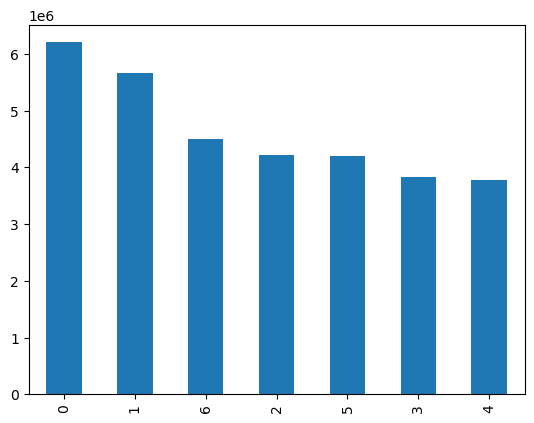

In [5]:
# Create bar chart
df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

In [6]:
# Export bar chart
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_all.png'))

NameError: name 'bar' is not defined

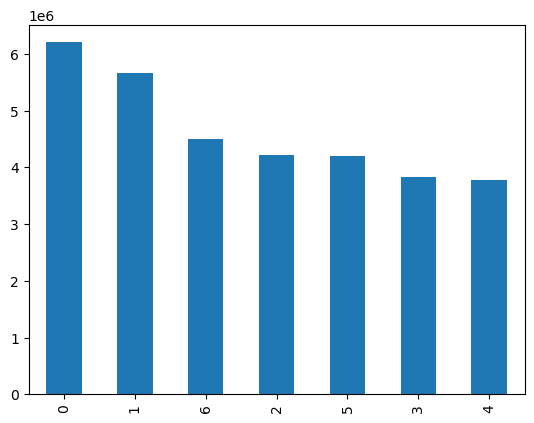

In [7]:
# Saving bar chart visualization to 'bar'
bar = df_ords_prods_all['orders_day_of_week'].value_counts().plot.bar()

In [8]:
# Export bar chart - Attempt 2
bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_all.png'))

<Axes: ylabel='Frequency'>

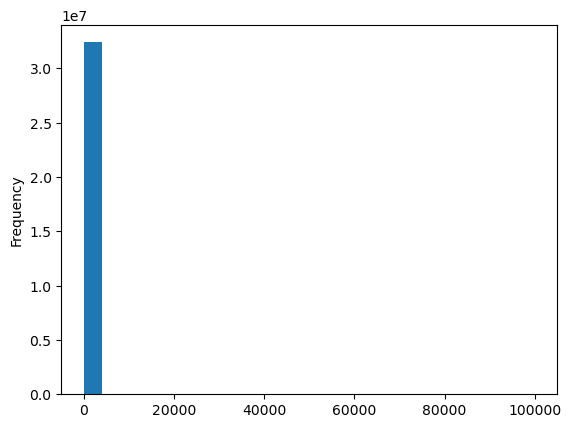

In [9]:
# Creating histogram
df_ords_prods_all['prices'].plot.hist(bins = 25)

As with the exercise, this is not what we would expect: We would not expect one large line with nothing else in the visualization. Going back to check for outliers or what might have caused this.

In [10]:
df_ords_prods_all['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<Axes: xlabel='prices', ylabel='prices'>

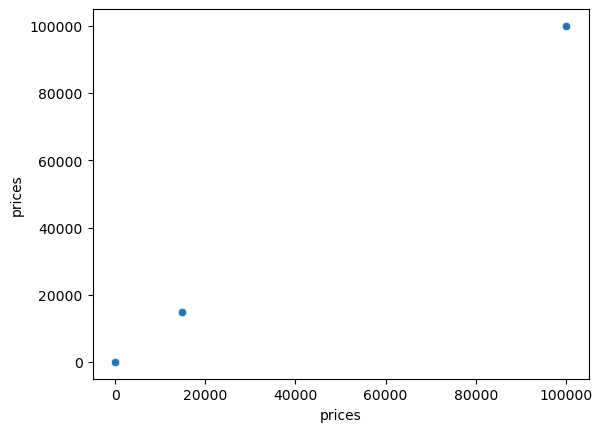

In [11]:
# Creating a scatterplot
sns.scatterplot(x = 'prices', y = 'prices',data = df_ords_prods_all)

We see here that there are some outliers that are skewing our histogram and analysis

In [12]:
# Identifying the outliers
df_ords_prods_all.loc[df_ords_prods_all['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income,True
7805,1435153,1519,26,2,11,6.0,21553,15,0,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
7806,1066435,1519,32,3,10,5.0,21553,28,1,Lowfat 2% Milkfat Cottage Cheese,...,Craig,Clark,Male,Rhode Island,68,3/4/2020,0,divorced/widowed,177864,both
15143,1697208,2409,33,1,19,5.0,21553,1,0,Lowfat 2% Milkfat Cottage Cheese,...,Nicole,Odonnell,Female,Hawaii,55,11/11/2018,2,married,230074,both
20264,965345,3531,27,2,19,8.0,33664,2,0,2 % Reduced Fat Milk,...,Alice,Compton,Female,Hawaii,80,10/6/2019,2,married,233776,both
20497,2943740,3793,1,2,9,NaN,21553,3,0,Lowfat 2% Milkfat Cottage Cheese,...,Jerry,Allen,Male,Louisiana,59,8/23/2019,3,married,182933,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32303799,3265389,51346,4,1,17,13.0,33664,2,1,2 % Reduced Fat Milk,...,nan,Gould,Male,Rhode Island,58,1/25/2019,1,married,207497,both
32307882,1179092,131671,12,4,9,15.0,33664,1,0,2 % Reduced Fat Milk,...,Diana,Hansen,Female,Rhode Island,35,8/4/2018,0,single,86490,both
32310810,1226705,39667,7,2,15,20.0,33664,14,0,2 % Reduced Fat Milk,...,Johnny,Colon,Male,Rhode Island,78,5/8/2019,2,married,195077,both
32330048,3000037,95105,2,4,19,22.0,33664,4,0,2 % Reduced Fat Milk,...,Catherine,Browning,Female,South Carolina,48,1/18/2017,2,married,398880,both


In [13]:
# Turning high priced items into NaNs
df_ords_prods_all.loc[df_ords_prods_all['prices'] >100, 'prices'] = np.nan

In [14]:
# Checking max value
df_ords_prods_all['prices'].max()

25.0

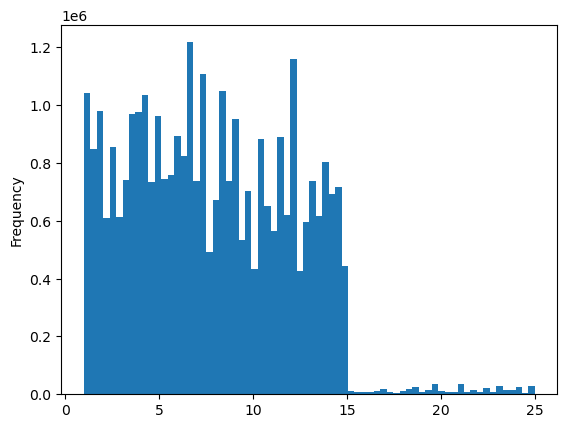

In [15]:
# Retrying histogram
hist = df_ords_prods_all['prices'].plot.hist(bins = 70)

In [16]:
# Exporting histogram
hist.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_prices_all.png'))

In order to create a line chart, will first create 70/30 sample subset.

In [17]:
# Creating 70/30 sample
np.random.seed(4)
dev = np.random.rand(len(df_ords_prods_all)) <= 0.7

In [18]:
# Store 70% of the sample in the dataframe big
big = df_ords_prods_all[dev]

In [19]:
# Store 30% of the sample in the dataframe small
small = df_ords_prods_all[~dev]

In [20]:
# Checking that this worked
len(df_ords_prods_all)

32404859

In [21]:
# Did it add up?
len(big) + len(small)

32404859

In [22]:
# Reduce samples to only columns necessary for chart
df_2 = small[['orders_day_of_week','prices']]

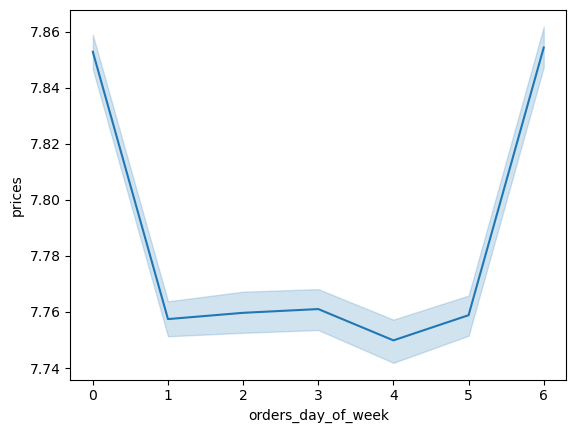

In [23]:
# Create line chart
line = sns.lineplot(data = df_2, x = 'orders_day_of_week',y = 'prices')

In [24]:
# Exporting line chart
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_orders_dow_all.png'))

### 03. Create histogram of 'order_hour_of_day' column

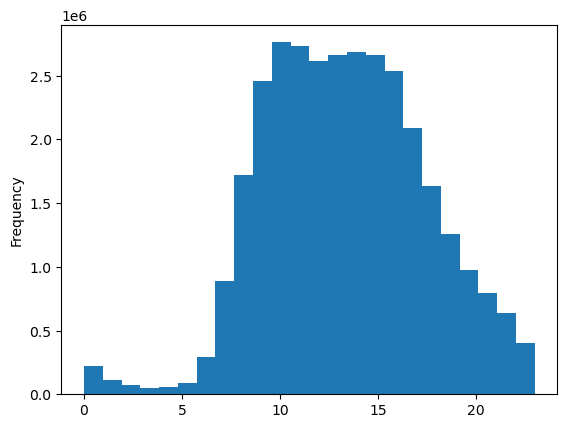

In [25]:
# Creating histogram for 'order_hour_of_day' column, using bins = 24 since 24 hours in a day
hist_hour = df_ords_prods_all['order_hour_of_day'].plot.hist(bins = 24)

The histogram is visualizing the frequency of orders for each hour of the day. We can see that the number of orders is at its maximum between around 9-15, which is between 9am and 3pm.

In [26]:
# Exporting histogram
hist_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day_all.png'))

### 04. Distribution of orders among customers in terms of loyalty. Create a bar chart from the 'loyalty_flag' column

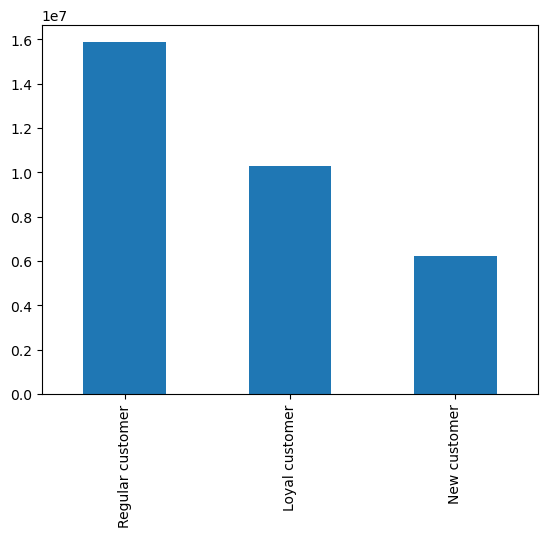

In [27]:
# Create bar chart
cust_loyalty = df_ords_prods_all['loyalty_flag'].value_counts().plot.bar()

We see in the bar chart above that regular customers place the most orders, and new customers place the lowest number of orders.

In [28]:
# Export bar chart
cust_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_cust_loyalty_all.png'))

### 05. Check whether there's a difference in expenditure depending on the hour of the day

In [29]:
# Reduce samples to only columns necessary for chart
df_3 = small[['prices', 'order_hour_of_day']]

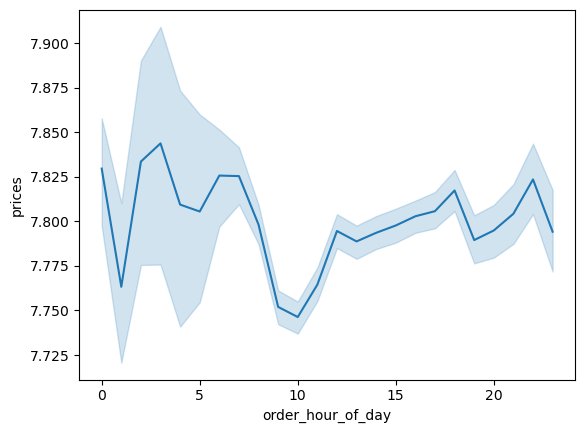

In [30]:
# Create line chart
line_hour = sns.lineplot(data = df_3, x = 'order_hour_of_day',y = 'prices')

In [31]:
# Exporting line chart
line_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_order_hour_of_day_all.png'))

### 06. Exploratory analysis of customer demographics to inform the targeted marketing campaigns. Is there a connection between age and family situation? Create a line chart: age and number of dependents

In [32]:
# Reduce samples to only columns necessary for chart
df_4 = small[['age', 'number_of_dependents']]

KeyError: "['number_of_dependents'] not in index"

In [33]:
# Reduce samples to only columns necessary for chart - Attempt 2 with British spelling
df_4 = small[['age', 'number_of_dependants']]

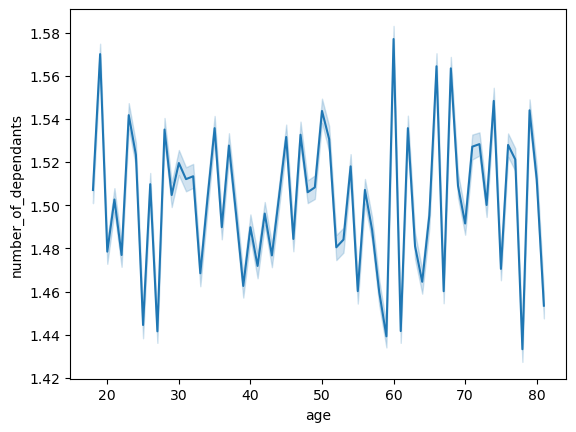

In [34]:
# Create line chart
line_age = sns.lineplot(data = df_4, x = 'age',y = 'number_of_dependants')

We see in the line chart above that there isn't a pattern or clear relationship between age and dependants. There is quite a fluctuation. Though we can see that the line starts at perhaps around age 18, which would make sense for someone younger than 18 to not have a dependant.

In [35]:
# Exporting line chart
line_age.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants_all.png'))

### 07. Is there a connection between age and spending power (income)? Create a scatterplot.

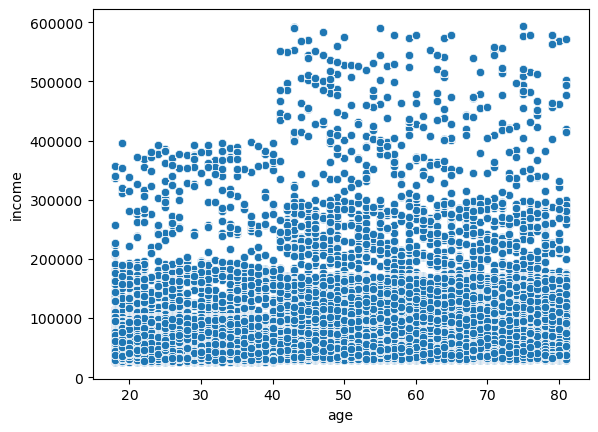

In [36]:
# Creating a scatterplot
scatter_income = sns.scatterplot(x = 'age', y = 'income',data = df_ords_prods_all)

The scatterplot above shows that there is a wide range of incomes across age. We can see around age 40 that income does increase. There is a large cluster of dots under the 200,000 income across all ages; so most folks have an income of 200,000 or under.

In [37]:
# Exporting the scatterplot
scatter_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatter_age_income_all.png'))